In [7]:
#import libraries
!pip install xgboost
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn import ensemble
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import numpy as np
from sklearn.inspection import plot_partial_dependence
from sklearn import metrics
!pip install fastparquet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [8]:
#read the dataset
df = pd.read_parquet(r"/Users/j.runge/Downloads/d14_d30_data_v3.parquet", engine= 'fastparquet')

In [9]:
df

,first_login,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,campaign,media_source,m_1,m_2,...,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,first_p_18,avg_p_19,sum_p_19,count_p_19
0,2021-12-18,3.779171,3.779171,3.849837,3.849837,3.849837,c_0,ms_0,Motorola,Moto E6s,...,25.85,3,27,<NA>,<NA>,<NA>,<NA>,4.060000,4.06,1
1,2021-12-18,0.222576,0.536247,0.536247,0.536247,0.536247,c_1,ms_0,OPPO,CPH2127,...,NaN,<NA>,19,2,<NA>,<NA>,<NA>,2.000000,2.00,1
4,2021-06-11,0.049088,0.049088,0.049088,0.049088,0.049088,c_2,ms_1,Vivo,1907,...,NaN,<NA>,37,<NA>,<NA>,<NA>,<NA>,6.928000,34.64,5
5,2021-08-17,NaN,NaN,NaN,NaN,0.761715,c_1,ms_0,Lenovo,TB-X606V,...,NaN,<NA>,8,<NA>,<NA>,<NA>,<NA>,5.000000,5.00,1
6,2021-08-10,0.377731,0.377731,0.377731,0.377731,0.377731,c_3,ms_1,OPPO,CPH2127,...,NaN,<NA>,4,<NA>,<NA>,<NA>,<NA>,2.390000,2.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331914,2021-10-01,0.048490,0.048490,0.048490,0.048490,0.048490,c_1,ms_0,Samsung,SM-J700F,...,NaN,<NA>,2,<NA>,<NA>,<NA>,<NA>,4.000000,4.00,1
331915,2021-12-03,0.299588,0.299588,0.299588,0.299588,0.299588,c_0,ms_0,None,None,...,NaN,<NA>,2,<NA>,<NA>,<NA>,<NA>,2.000000,2.00,1
331916,2021-12-03,NaN,NaN,79.165510,118.631176,119.051302,c_60,ms_1,Vivo,Vivo 2015,...,NaN,<NA>,85,<NA>,0,143,<NA>,25.777778,232.00,9
331917,2021-02-06,0.641836,0.641836,0.641836,0.641836,0.641836,c_5,ms_1,OPPO,CPH2015,...,NaN,<NA>,8,<NA>,<NA>,<NA>,<NA>,2.480000,2.48,1


In [10]:
#fill the N/A values
df = df.fillna(0)

In [11]:
#display top results
df = df.head(20000)

In [12]:
#Drop the columns
dfx = df.drop(columns = ['d30_spend','first_login','campaign','media_source','m_1','m_2','u_3','u_1','u_4','u_2','p_3'])

In [13]:
dfx

,d1_spend,d3_spend,d7_spend,d14_spend,m_3,m_4,avg_p_1,count_p_1,max_p_2,p_4,...,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,first_p_18,avg_p_19,sum_p_19,count_p_19
0,3.779171,3.779171,3.849837,3.849837,0,0,40.583161,72,0.01,0.500000,...,25.85,3,27,0,0,0,0,4.060,4.06,1
1,0.222576,0.536247,0.536247,0.536247,0,0,64.728265,40,0.01,0.500000,...,0.00,0,19,2,0,0,0,2.000,2.00,1
4,0.049088,0.049088,0.049088,0.049088,0,0,91.734774,3,0.01,0.000000,...,0.00,0,37,0,0,0,0,6.928,34.64,5
5,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0,0.00,0.000000,...,0.00,0,8,0,0,0,0,5.000,5.00,1
6,0.377731,0.377731,0.377731,0.377731,0,0,62.417732,18,0.01,0.500000,...,0.00,0,4,0,0,0,0,2.390,2.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,0.266826,0.266826,0.266826,0.266826,0,0,43.615445,18,0.01,0.666667,...,0.00,0,12,0,0,0,0,2.590,2.59,1
22697,0.129286,0.129286,0.129286,0.129286,0,0,44.274785,8,0.01,0.500000,...,0.00,0,12,0,0,0,0,2.000,2.00,1
22698,0.225761,0.225761,0.225761,0.225761,0,0,27.636236,11,0.01,0.500000,...,0.00,0,23,0,0,0,0,12.750,102.00,8
22699,44.236229,116.113346,264.589331,267.635450,0,0,66.920192,1253,0.01,0.666667,...,400.00,2,236,22,819,146,0,32.809,656.18,20


In [14]:
#check for null values
print(dfx.shape[0])
for i in dfx:
    if dfx[i].isna().sum() > 0:
        print(f'{i}---->{dfx[i].dtypes}---->{dfx[i].isna().sum()}')

20000


In [15]:
#descriptive statistics
dfx.describe()

,d1_spend,d3_spend,d7_spend,d14_spend,m_3,m_4,avg_p_1,count_p_1,max_p_2,p_4,...,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,first_p_18,avg_p_19,sum_p_19,count_p_19
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,6.886881,17.864998,30.727450,50.267478,0.051750,0.051750,45.854733,42.066950,0.009801,0.365289,...,197.421072,0.378650,20.944000,8.316800,5.583900,36.798150,0.06475,7.368713,44.658120,2.718900
std,90.452437,304.894519,484.593397,755.185304,0.221527,0.221527,28.105392,210.194924,0.001397,0.279018,...,2831.962157,2.738366,61.534384,32.282233,81.336241,956.196407,0.24609,16.982541,365.936703,52.182124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.013333,0.022072,0.028636,0.035000,0.000000,0.000000,29.000000,1.000000,0.010000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,2.000000,2.000000,1.000000
50%,0.078333,0.096166,0.100000,0.103923,0.000000,0.000000,50.000000,4.000000,0.010000,0.500000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.00000,2.590000,2.620000,1.000000
75%,0.312312,0.411386,0.493730,0.555921,0.000000,0.000000,64.133357,12.000000,0.010000,0.500000,...,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.00000,7.000000,14.000000,2.000000
max,5698.203382,19778.961262,30828.618424,40416.562376,1.000000,1.000000,190.206776,5657.000000,0.010000,1.000000,...,212421.000000,106.000000,2013.000000,924.000000,4070.000000,119862.000000,1.00000,626.000000,38988.000000,7264.000000


## Random Forest Regression

In [20]:
X = dfx
y = df.d30_spend

In [28]:
#10 fold cross validation
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 16000, Test set:4000
Fold:2, Train set: 16000, Test set:4000
Fold:3, Train set: 16000, Test set:4000
Fold:4, Train set: 16000, Test set:4000
Fold:5, Train set: 16000, Test set:4000


In [29]:
#function to calculate the rmse score
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [30]:
#random forest algorithm 
reg=RandomForestRegressor(random_state=42)
score = cross_val_score(reg, X, y,
                        cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [ -496649.39641503 -1633752.10914652  -535702.32258588  -394763.40895458
  -340547.69858921]
rmse= 824.79


In [31]:
#variable importance charts
df_var_imp = pd.DataFrame({'Variable': dfx.columns,
                           'Importance': reg.fit(X,y).feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

<AxesSubplot:ylabel='Variable'>

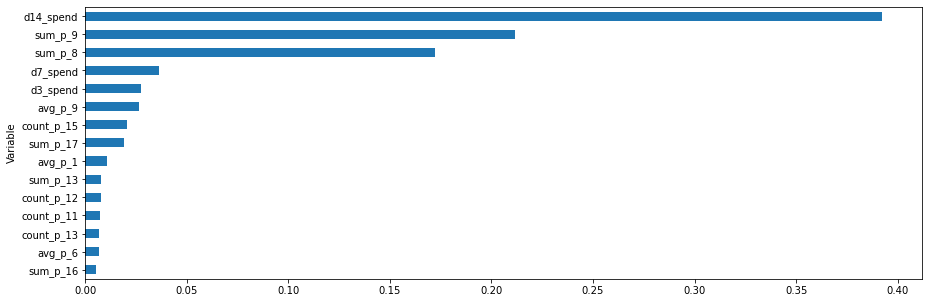

In [32]:
#top 15 variables which are important
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

/Users/j.runge/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


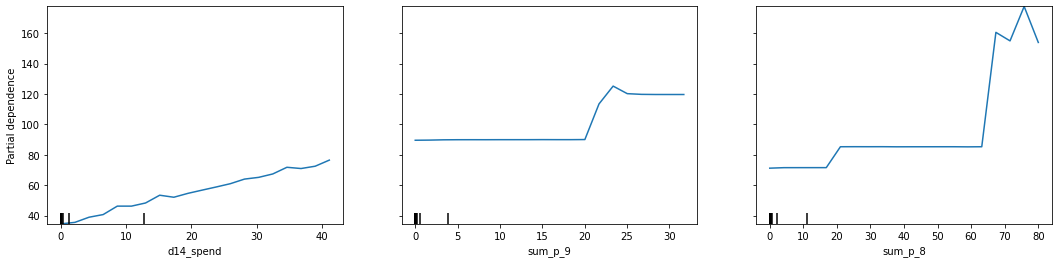

In [33]:
#partial dependency plot
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(reg, X, ['d14_spend','sum_p_9','sum_p_8'],
                        grid_resolution=20, ax=ax);

## Classification Random Forest

In [34]:
df.d30_spend = df.d30_spend.apply(lambda x:1 if x > 0 else 0)

In [35]:
y_train_clf = df.d30_spend

In [36]:
#Random forest classifier
clf=RandomForestClassifier(random_state = 42,max_depth=2,n_estimators=20)

In [37]:
#standardization
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=col)
score = cross_val_score(clf, X, y_train_clf,
                        cv=kf, scoring="accuracy")
score
#print(f'Scores for each fold: {score}')
#rmse(score.mean())

array([0.9995 , 0.99975, 0.99925, 0.99975, 0.9995 ])

In [38]:
#accuracy for random forest classificaiton
print(f'The average accuracy for random forest model is:{np.average(score)}')

The average accuracy for random forest model is:0.9995499999999999


In [39]:
#variable importance
df_var_imp = pd.DataFrame({'Variable': dfx.columns,
                           'Importance': clf.fit(X,y_train_clf).feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

<AxesSubplot:ylabel='Variable'>

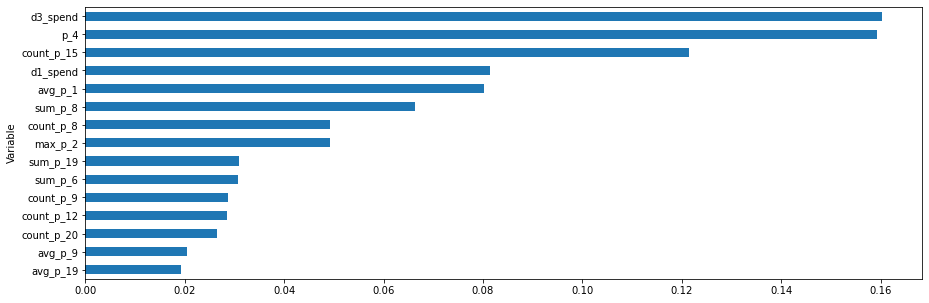

In [40]:
#top 15 variable importance chart
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

/Users/j.runge/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


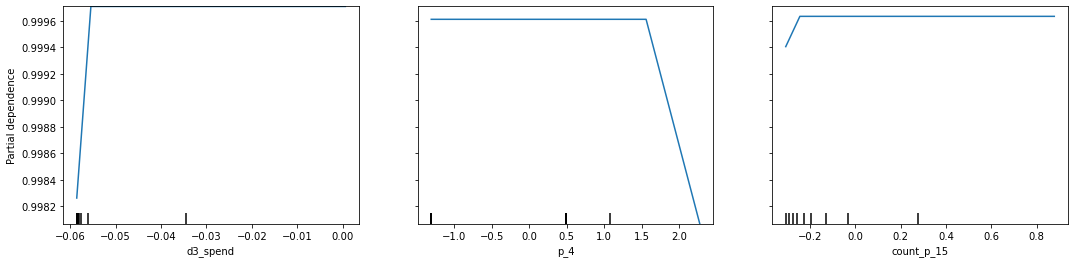

In [42]:
#partial dependency plots
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(clf, X, ['d3_spend','p_4','count_p_15'],
                        grid_resolution=20, ax=ax);

<AxesSubplot:>

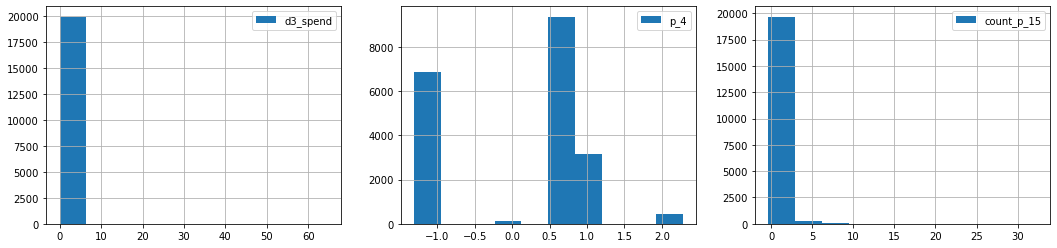

In [43]:
#histogram for partial dependency
fig,ax = plt.subplots(1, 3, figsize=(18, 4))
X['d3_spend'].hist(ax=ax[0], legend=True)
X['p_4'].hist(ax=ax[1], legend=True)
X['count_p_15'].hist(ax=ax[2], legend=True)

## Classification XGBoost


In [44]:
#import libraries
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 20)


In [45]:
#XGBoost with 10 fold - cross validation 
score=cross_val_score(classifier,X,y_train_clf,cv=kf,scoring="accuracy")

print(f'Scores for each fold: {score}')
print(f'The average accuracy for random forest model is:{np.average(score)}')
#rmse(score.mean())

Scores for each fold: [1.      1.      0.99925 1.      1.     ]
The average accuracy for random forest model is:0.99985


In [47]:
#variable selection plot
df_var_imp = pd.DataFrame({'Variable': dfx.columns,
                           'Importance': classifier.fit(X,y_train_clf).feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

<AxesSubplot:ylabel='Variable'>

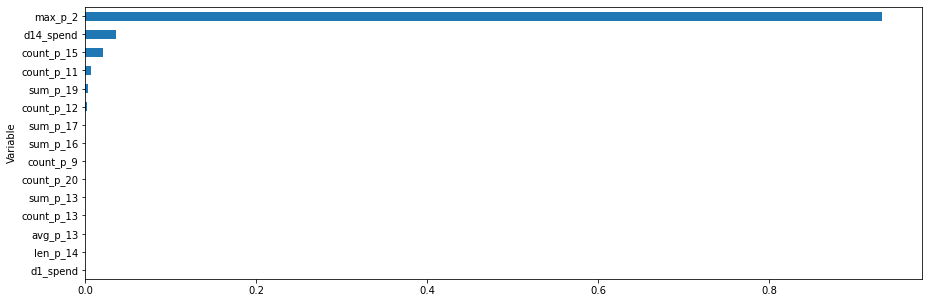

In [48]:
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

/Users/j.runge/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


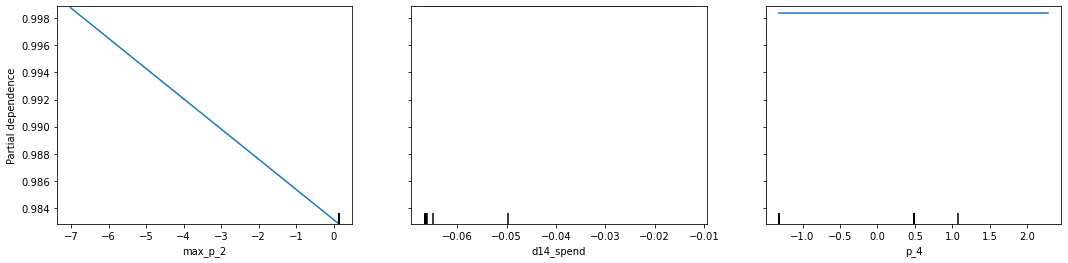

In [50]:
#partial dependency plot
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(classifier, X, ['max_p_2','d14_spend','p_4'],
                        grid_resolution=20, ax=ax);

<AxesSubplot:>

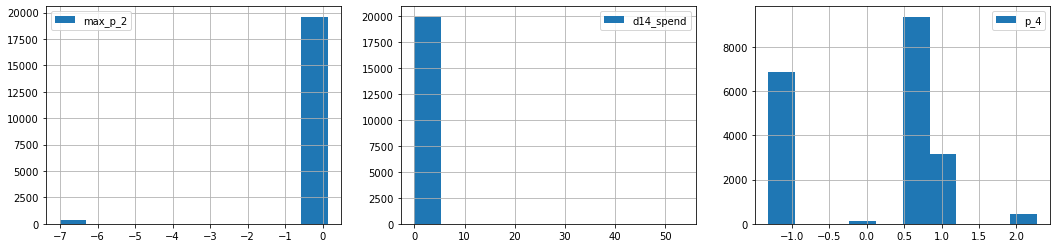

In [51]:
fig,ax = plt.subplots(1, 3, figsize=(18, 4))
X['max_p_2'].hist(ax=ax[0], legend=True)
X['d14_spend'].hist(ax=ax[1], legend=True)
X['p_4'].hist(ax=ax[2], legend=True)

## XGBoost Regression

In [52]:
#XGBoost regressor
XGB = XGBRegressor()

In [54]:
#XGBoost with 10-fold cross validation
score=cross_val_score(XGB,X,y,cv=kf,scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [ -661464.81309561 -1375156.79029754  -593850.44971545  -375109.29390857
 -1178177.28056648]
rmse= 914.74


In [56]:
#variable importance
df_var_imp = pd.DataFrame({'Variable': dfx.columns,
                           'Importance': XGB.fit(X,y).feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

<AxesSubplot:ylabel='Variable'>

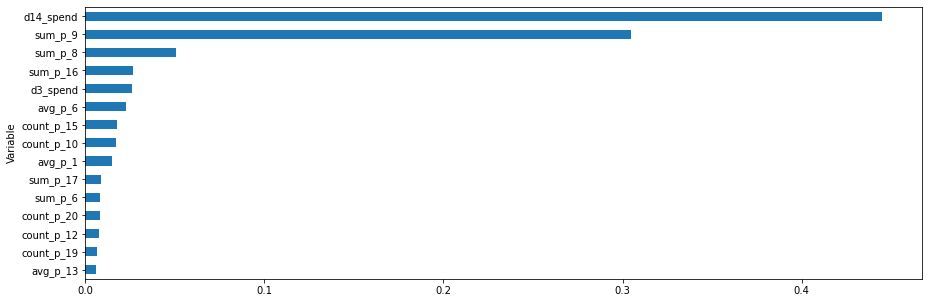

In [57]:
#top 15 important variables
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

/Users/j.runge/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


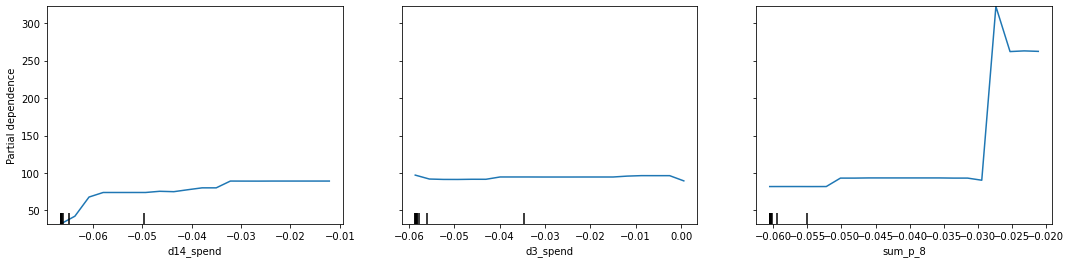

In [58]:
#partial dependency 
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(XGB, X, ['d14_spend','d3_spend','sum_p_8'],
                        grid_resolution=20, ax=ax);

<AxesSubplot:>

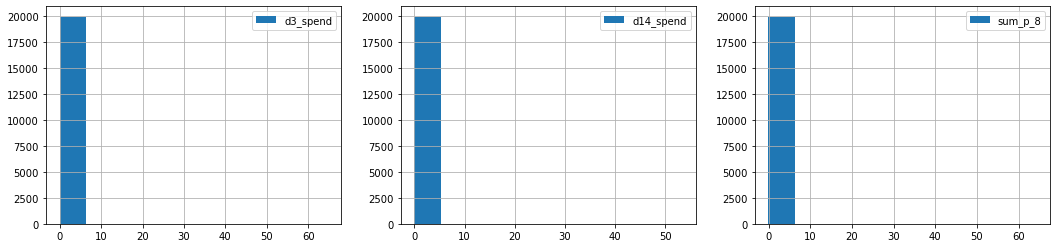

In [59]:
#Histogram for partial dependency 
fig,ax = plt.subplots(1, 3, figsize=(18, 4))
X['d3_spend'].hist(ax=ax[0], legend=True)
X['d14_spend'].hist(ax=ax[1], legend=True)
X['sum_p_8'].hist(ax=ax[2], legend=True)

## Conclusion - TBD    